# Data Augmentation

*This notebook is to visualize the effects of data augmentation on images.*

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"  # to avoid too many logs from tensorflow-metal

In [3]:
IMAGE_PATH = "../../data/home_pizza.jpg"

# Load an image
image = load_img(IMAGE_PATH)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

In [4]:
def show_augmentation(datagen, original_image):

    # Generate augmented images
    augmented_images = []
    for i in range(8):
        augmented_image = datagen.flow(original_image)[0][0]
        augmented_images.append(augmented_image)

    # Plot the images
    fig, axs = plt.subplots(3, 3, figsize = (10, 10))

    axs[0, 0].set_title("Original Image")
    axs[0, 0].imshow(original_image[0].astype(np.uint8))
    axs[0, 0].axis("off")

    for i in range(1, 9):
        augmented_image = augmented_images[i - 1]
        axs[i // 3, i % 3].set_title(f"Augmented Image {i}")
        axs[i // 3, i % 3].imshow(augmented_image.astype(np.uint8))
        axs[i // 3, i % 3].axis("off")

    plt.show()

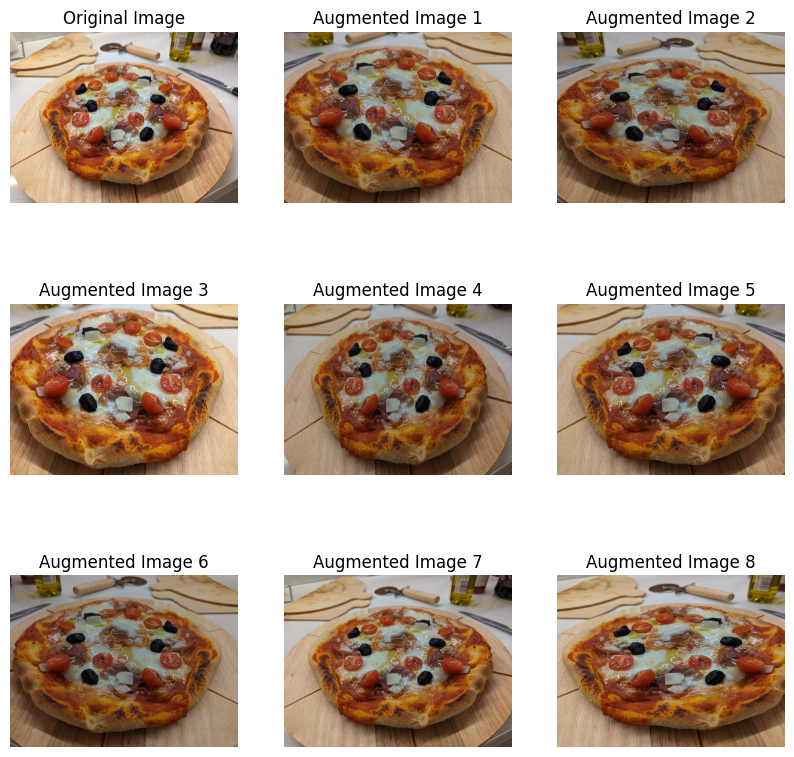

In [5]:
# Low level
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    brightness_range=(0.7, 1),
    zoom_range=[0.7, 1],
)

show_augmentation(datagen, image)

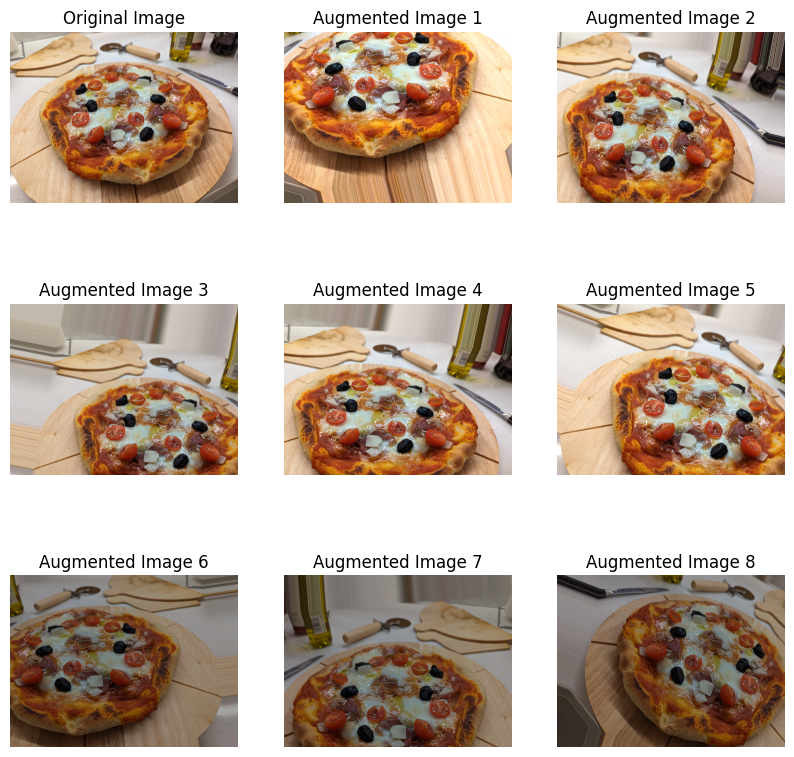

In [6]:
# Medium level
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=[0.7, 1],
    horizontal_flip=True,
    brightness_range=(0.5, 1.2),
    rotation_range=20,
    shear_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2
)

show_augmentation(datagen, image)

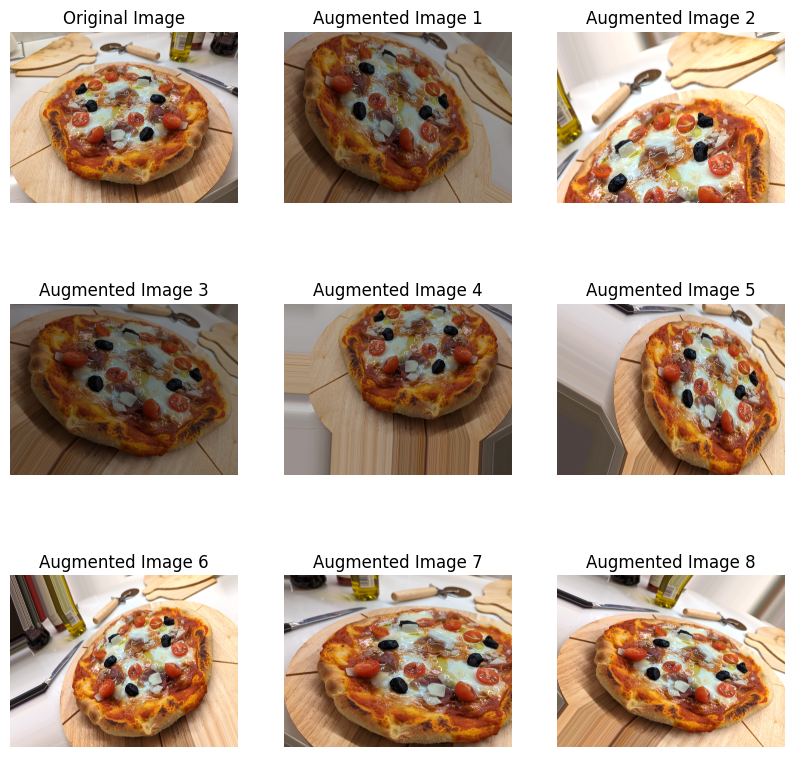

In [7]:
# High level
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=[0.5, 1.2],
    horizontal_flip=True,
    brightness_range=(0.5, 1.2),
    rotation_range=30,
    shear_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2
)

show_augmentation(datagen, image)